# Regression: Predict Stock Market Returns

https://www.kaggle.com/c/the-winton-stock-market-challenge/data

### Data fields (Original Competition)
- Feature_1 to Feature_25: different features relevant to prediction
- Ret_MinusTwo:  this is the return from the close of trading on day D-2 to the close of trading on day D-1 (i.e. 1 day)
- Ret_MinusOne: this is the return from the close of trading on day D-1 to the point at which the intraday returns start on day D (approximately 1/2 day)
- Ret_2 to Ret_120: these are returns over approximately one minute on day D. Ret_2 is the return between t=1 and t=2. 
- Ret_121 to Ret_180: intraday returns over approximately one minute on day D. These are the target variables you need to predict as {id}_{1-60}. 
- Ret_PlusOne: this is the return from the time Ret_180 is measured on day D to the close of trading on day D+1. (approximately 1 day). This is a target variable you need to predict as {id}_61. 
- Ret_PlusTwo: this is the return from the close of trading on day D+1 to the close of trading on day D+2 (i.e. 1 day) This is a target variable you need to predict as {id}_62. 
- Weight_Intraday: weight used to evaluate intraday return predictions Ret 121 to 180
- Weight_Daily: weight used to evaluate daily return predictions (Ret_PlusOne and Ret_PlusTwo).

### Data fields (Simplified)

- Feature_1 to Feature_5: different features relevant to prediction
- Ret_MinusTwo:  this is the return from the close of trading on day D-2 to the close of trading on day D-1 (i.e. 1 day)
- Ret_MinusOne: this is the return from the close of trading on day D-1 to the point at which the intraday returns start on day D (approximately 1/2 day)
- Ret_2: return between t=1 and t=2

Target Variable: Ret_3

In [1]:
# conda install pandas seaborn matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('../../data/winton-stock-market/train_10k.csv',
                 usecols=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
                          'Ret_MinusTwo', 'Ret_MinusOne', 'Ret_2', 'Ret_3'])
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3
0,NaN,NaN,-0.284087,NaN,9.0,0.085416,0.021266,2.811169e-04,-0.000023
1,5.0,-0.437876,-0.580123,-0.059929,8.0,-0.020794,-0.013768,2.167592e-07,0.002125
2,8.0,-1.102696,2.507068,1.849702,8.0,-0.010189,0.004868,-2.228728e-05,-0.000140
3,NaN,NaN,-0.392584,NaN,1.0,-0.053207,0.022431,-7.589208e-04,0.000733
4,NaN,NaN,NaN,-0.038831,9.0,0.019479,-0.013250,-6.426620e-04,0.001152


In [4]:
df.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Ret_MinusTwo', 'Ret_MinusOne', 'Ret_2', 'Ret_3'],
      dtype='object')

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Feature_1       1695 non-null float64
Feature_2       7723 non-null float64
Feature_3       9709 non-null float64
Feature_4       8123 non-null float64
Feature_5       10000 non-null float64
Ret_MinusTwo    10000 non-null float64
Ret_MinusOne    10000 non-null float64
Ret_2           9726 non-null float64
Ret_3           9711 non-null float64
dtypes: float64(9)
memory usage: 703.2 KB


In [6]:
df[df.isna().values]

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3
0,NaN,NaN,-0.284087,NaN,9.0,0.085416,0.021266,2.811169e-04,-0.000023
0,NaN,NaN,-0.284087,NaN,9.0,0.085416,0.021266,2.811169e-04,-0.000023
0,NaN,NaN,-0.284087,NaN,9.0,0.085416,0.021266,2.811169e-04,-0.000023
3,NaN,NaN,-0.392584,NaN,1.0,-0.053207,0.022431,-7.589208e-04,0.000733
3,NaN,NaN,-0.392584,NaN,1.0,-0.053207,0.022431,-7.589208e-04,0.000733
3,NaN,NaN,-0.392584,NaN,1.0,-0.053207,0.022431,-7.589208e-04,0.000733
4,NaN,NaN,NaN,-0.038831,9.0,0.019479,-0.013250,-6.426620e-04,0.001152
4,NaN,NaN,NaN,-0.038831,9.0,0.019479,-0.013250,-6.426620e-04,0.001152
4,NaN,NaN,NaN,-0.038831,9.0,0.019479,-0.013250,-6.426620e-04,0.001152
5,NaN,0.008657,NaN,0.476428,1.0,0.030188,0.001525,2.300257e-03,-0.001657


In [7]:
# count NaN values in each feature
df.isna().sum()

Feature_1       8305
Feature_2       2277
Feature_3        291
Feature_4       1877
Feature_5          0
Ret_MinusTwo       0
Ret_MinusOne       0
Ret_2            274
Ret_3            289
dtype: int64

In [8]:
target = 'Ret_3'
features = df.columns[df.columns != target]

In [9]:
# drop Ret_3's values that are NaN
df.drop(df[df[target].isna()].index, inplace=True)

In [10]:
for f in features:
    print(f, 'nan count:', df[f].isna().sum(), 'unique value count:', len(df[f].unique()))

Feature_1 nan count: 8039 unique value count: 11
Feature_2 nan count: 2197 unique value count: 7515
Feature_3 nan count: 280 unique value count: 9432
Feature_4 nan count: 1822 unique value count: 7890
Feature_5 nan count: 0 unique value count: 10
Ret_MinusTwo nan count: 0 unique value count: 9711
Ret_MinusOne nan count: 0 unique value count: 9711
Ret_2 nan count: 236 unique value count: 9392


In [11]:
# Feature 1 is categorical
df['Feature_1'].unique()

array([nan,  5.,  8.,  6.,  4.,  1.,  3., 10.,  9.,  2.,  7.])

In [12]:
# replace with 0
df['Feature_1'].fillna(0, inplace=True)
df['Feature_1'].unique()

array([ 0.,  5.,  8.,  6.,  4.,  1.,  3., 10.,  9.,  2.,  7.])

In [13]:
# interpolate the rest
df.interpolate(inplace=True)

In [14]:
# check if there are still stragglers
df[features].isna().sum()

Feature_1       0
Feature_2       1
Feature_3       0
Feature_4       1
Feature_5       0
Ret_MinusTwo    0
Ret_MinusOne    0
Ret_2           0
dtype: int64

In [15]:
# print them
df[df.isna().values]

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3
0,0.0,NaN,-0.284087,NaN,9.0,0.085416,0.021266,0.000281,-0.000023
0,0.0,NaN,-0.284087,NaN,9.0,0.085416,0.021266,0.000281,-0.000023


In [16]:
# these are all beginner values, we can interpolate from the later values
df.fillna(method='bfill', inplace=True)

In [17]:
# check if there are still stragglers
df[features].isna().sum()

Feature_1       0
Feature_2       0
Feature_3       0
Feature_4       0
Feature_5       0
Ret_MinusTwo    0
Ret_MinusOne    0
Ret_2           0
dtype: int64

## Data Exploration

In [18]:
df.corr()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3
Feature_1,1.000000,-0.072020,0.156461,0.093360,0.002794,0.017561,-0.008489,-0.003693,-0.017196
Feature_2,-0.072020,1.000000,-0.134596,-0.150832,0.058094,0.011479,-0.003174,0.022188,-0.008483
Feature_3,0.156461,-0.134596,1.000000,0.658190,-0.037776,0.004572,0.002413,-0.001450,-0.002409
Feature_4,0.093360,-0.150832,0.658190,1.000000,-0.186919,0.001848,0.015225,-0.002016,-0.004148
Feature_5,0.002794,0.058094,-0.037776,-0.186919,1.000000,-0.009125,0.000064,-0.002430,0.005624
Ret_MinusTwo,0.017561,0.011479,0.004572,0.001848,-0.009125,1.000000,0.033770,0.057593,0.015997
Ret_MinusOne,-0.008489,-0.003174,0.002413,0.015225,0.000064,0.033770,1.000000,0.036802,0.011664
Ret_2,-0.003693,0.022188,-0.001450,-0.002016,-0.002430,0.057593,0.036802,1.000000,0.061739
Ret_3,-0.017196,-0.008483,-0.002409,-0.004148,0.005624,0.015997,0.011664,0.061739,1.000000


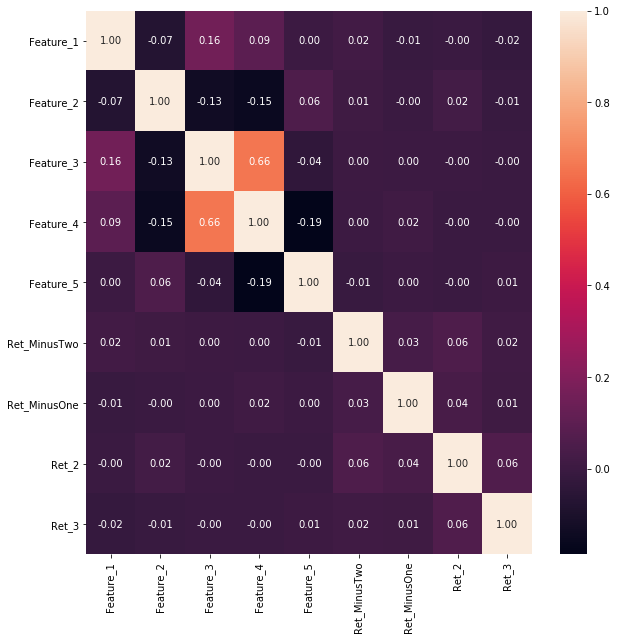

In [19]:
fig, axes = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=axes, annot=True, fmt='.2f')

## Feature Reduction / Selection

We will not do feature reduction or selection here, to keep things simple. This is also why we've only selected a subset of features for this workshop.

Once you've learnt about feature reduction and selection, you should try the techniques here. 

For example, consider applying PCA with the full set of features to reduce dimensions.

## Feature Scaling

We will perform feature scaling to normalise the feature ranges.

Before features can be scaled, we need to holdout (separate out) the test dataset from the training dataset. 

In [20]:
X = df.loc[:, features]
y = df.loc[:, target]

X.describe() # inspect the feature ranges

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Ret_MinusTwo,Ret_MinusOne,Ret_2
count,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000
mean,0.627536,-0.142937,0.590854,0.430722,5.508084,0.000836,-0.000886,0.000010
std,1.810252,1.175844,0.901793,0.761129,2.926338,0.028229,0.030905,0.001002
min,0.000000,-3.425563,-1.486053,-5.440596,1.000000,-0.517583,-0.368550,-0.013118
25%,0.000000,-0.951401,-0.081426,-0.054705,2.000000,-0.010649,-0.011011,-0.000311
50%,0.000000,-0.406355,0.479842,0.441449,6.000000,0.000091,-0.000757,0.000000
75%,0.000000,0.402713,1.093581,0.937423,8.000000,0.010998,0.008673,0.000313
max,10.000000,3.921978,4.530405,2.874605,10.000000,0.297811,0.852139,0.032149


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, X_test.shape)

(7283, 8) (2428, 8)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Z_train = scaler.fit_transform(X_train)
Z_test = scaler.transform(X_test)

## Train Model

Let's try training a Linear Regression model, using Stochastic Gradient Descent.

We will perform cross-validation here as well, and plot the learning curve to see how our training went.

In [23]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve

estimator = SGDRegressor(random_state=42, tol=1e-3, max_iter=1000)

# since we have quite a large dataset, we can try smaller chunks of training sizes
# for smaller datasets, the default is okay
train_sizes=[0.01, 0.05, 0.10, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

sample_sizes, train_scores, val_scores = learning_curve(estimator, Z_train, y_train, cv=3,
                                                        train_sizes=train_sizes,
                                                        verbose=1, random_state=42)

[learning_curve] Training set sizes: [  48  242  485  971 1456 1942 2427 2913 3398 3884 4369 4855]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.0s finished


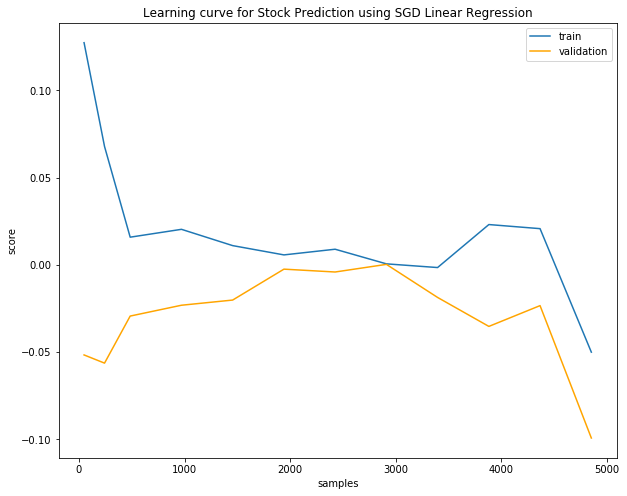

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(sample_sizes, train_scores.mean(axis=1), label='train')
ax.plot(sample_sizes, val_scores.mean(axis=1), color='orange', label='validation')
ax.set(xlabel='samples', ylabel='score', title='Learning curve for Stock Prediction using SGD Linear Regression')
ax.legend()

Looking at the learning curve, the model performs worse as training progresses.

Therefore, use a subset of training data to stop training early.

In [25]:
subset = 3000

Z_train_subset = Z_train[:subset]
y_train_subset = y_train[:subset]

model = SGDRegressor(random_state=42, tol=1e-3, max_iter=1000, verbose=True)
model.fit(Z_train_subset, y_train_subset)

# score on the test set
print(model.score(Z_test, y_test))

-- Epoch 1
Norm: 0.00, NNZs: 8, Bias: 0.000001, T: 3000, Avg. loss: 0.000001
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 8, Bias: 0.000028, T: 6000, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 8, Bias: -0.000012, T: 9000, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 8, Bias: 0.000005, T: 12000, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 8, Bias: -0.000045, T: 15000, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 8, Bias: -0.000009, T: 18000, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds
-0.010292630349856724


## Evaluation Metrics

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(Z_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 8.363026188631156e-07
R2: -0.010292630349856724


## Deployment and Prediction

Inventory (what's needed for prediction):
1. Scaler for X: use for scaling inputs before passing to model
2. Model: use for getting the prediction

In [27]:
# save model for later use
import pickle

pickle.dump(scaler, open('01_stock_prediction_X_scaler.pickle', 'wb'))
pickle.dump(model, open('01_stock_predicton_model.pickle', 'wb'))

In [28]:
# load model in deployment

scaler1 = pickle.load(open('01_stock_prediction_X_scaler.pickle', 'rb'))
model1 = pickle.load(open('01_stock_predicton_model.pickle', 'rb'))

# imagine we have test data
test_data = X_test[:10]
test_targets = y_test[:10]

Z_test_data = scaler1.transform(test_data)
y_test_pred = model1.predict(Z_test_data)

print('Truth', test_targets.values)
print('Predictions', y_test_pred)

Truth [ 0.00011033  0.          0.00026624  0.00025148 -0.00070979  0.00013967
  0.0020999  -0.0001807   0.         -0.00031004]
Predictions [-7.51608287e-06  6.65163314e-05 -1.99661149e-05  6.08837328e-06
  1.50626608e-06 -1.54338647e-04 -4.97355547e-05 -2.27120869e-05
 -1.59165829e-05 -3.66486562e-06]


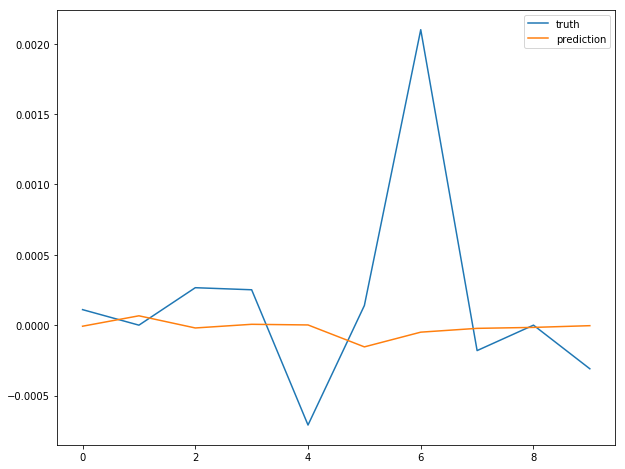

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(test_targets.values, label='truth')
ax.plot(y_test_pred, label='prediction')
ax.legend()

## What's next

So the result isn't too good. This is expected for a few reasons:
* We've only selected a subset of features
* There can be better ways to modeling the return history, such as using statistical time series models (ARIMA), or recurrent neural networks.
* A Linear Regression model is too naive, because it assumes a linear relationship between features and the target variable
* This is part of a Kaggle challenge, here are some ideas from participants:
   - https://www.google.com.sg/search?q=Winton+stock+market+challenge
   - https://www.kaggle.com/c/the-winton-stock-market-challenge/discussion/18584